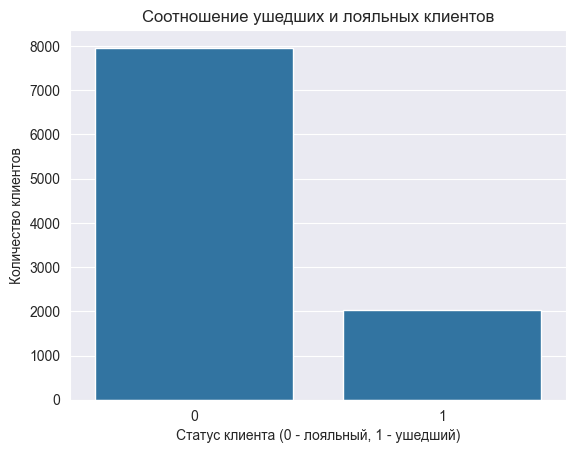

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

#Очистка данных
#Удалим столбец RowNumber, так как он не нужен для анализа.

data = churn_data.drop(columns=['RowNumber'])
#проверим таблицу.
#data.info()



# Распределение целевой переменной
sns.countplot(x='Exited', data=data)
plt.title('Соотношение ушедших и лояльных клиентов')
plt.xlabel('Статус клиента (0 - лояльный, 1 - ушедший)')
plt.ylabel('Количество клиентов')
plt.show()


На текущий момент единственное, что понятно, это то, что 20% клиентов ушли, надо понять, за какой это период?
Из тех данных, что есть в таблице, такой вывод сделать невозможно, по этому принимаем как факт и разбираемся дальше в причинах.

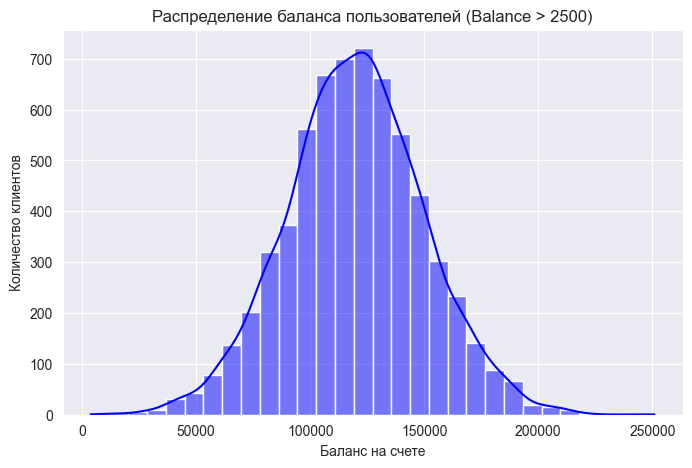

count      6383.000000
mean     119827.493793
std       30095.056462
min        3768.690000
25%      100181.975000
50%      119839.690000
75%      139512.290000
max      250898.090000
Name: Balance, dtype: float64


In [5]:
#9.2 Фильтрация данных: оставляем только клиентов с балансом больше 2500
filtered_data = data[data['Balance'] > 2500]

# Построение гистограммы распределения баланса
plt.figure(figsize=(8, 5))
sns.histplot(filtered_data['Balance'], bins=30, kde=True, color='blue')
plt.title('Распределение баланса пользователей (Balance > 2500)')
plt.xlabel('Баланс на счете')
plt.ylabel('Количество клиентов')
plt.show()
print(filtered_data['Balance'].describe())

Однозначно можно сделать выводы такие, что в целом структурный баланс клиентов в правильном распределении, на первый взгляд все хорошо. Но мы должны узнать, что происходит и какие балансы у клиентов, которые ушли? 

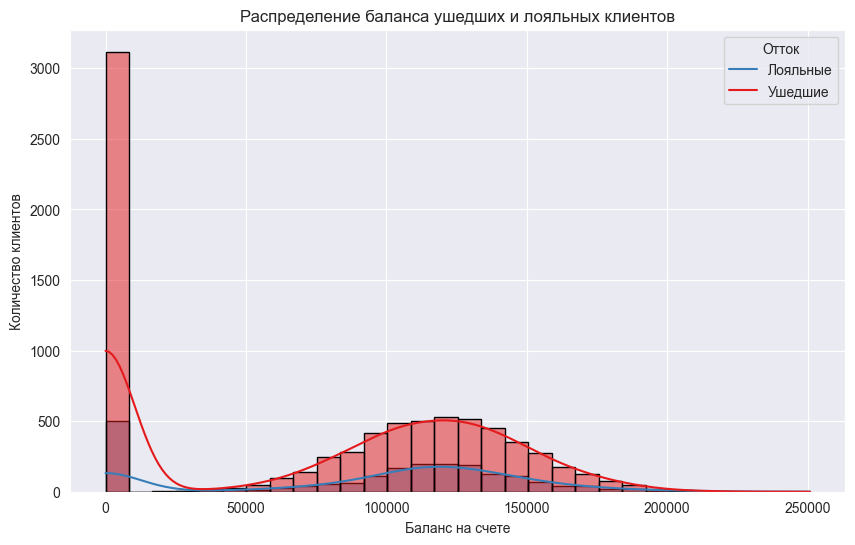

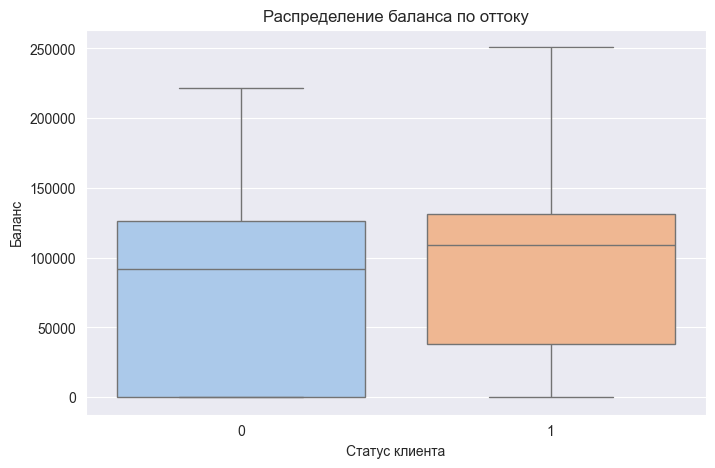

In [15]:
# Построение гистограммы и графика плотности для баланса в разрезе оттока
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Balance', hue='Exited', bins=30, kde=True, palette='Set1', edgecolor='black')
plt.title('Распределение баланса ушедших и лояльных клиентов')
plt.xlabel('Баланс на счете')
plt.ylabel('Количество клиентов')
plt.legend(title='Отток', labels=['Лояльные', 'Ушедшие'])
plt.show()


plt.figure(figsize=(8, 5))
sns.boxplot(
    data=data, 
    x='Exited', 
    y='Balance', 
    hue='Exited',  # Добавляем hue
    palette='pastel', 
    legend=False    # Отключаем легенду
)
plt.title('Распределение баланса по оттоку')
plt.xlabel('Статус клиента')
plt.ylabel('Баланс')
plt.show()

Ушедшие клиенты имеют более высокий средний баланс. Возможно клиенты с большими суммами на счетах могут быть недовольны отсутствием персонализированного обслуживания или низкими процентными ставками.